<a href="https://colab.research.google.com/github/amriteshwarpandey/health-web-site-/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Color spaces conversion

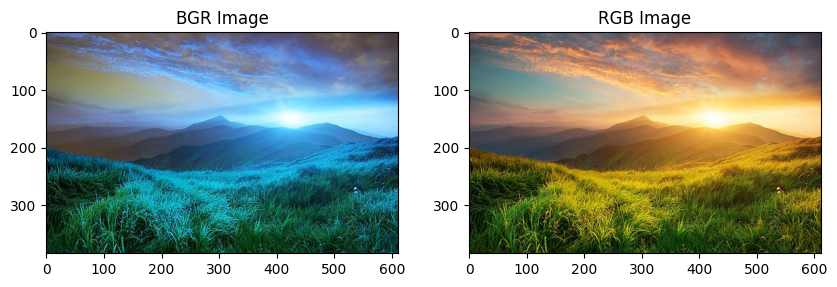

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image in BGR format
image = cv2.imread(r"/content/istockphoto-517188688-612x612.jpeg")

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('BGR Image')
plt.imshow(image)  # This will look incorrect because Matplotlib expects RGB

plt.subplot(1, 2, 2)
plt.title('RGB Image')
plt.imshow(image_rgb)  # This will look correct

plt.show()

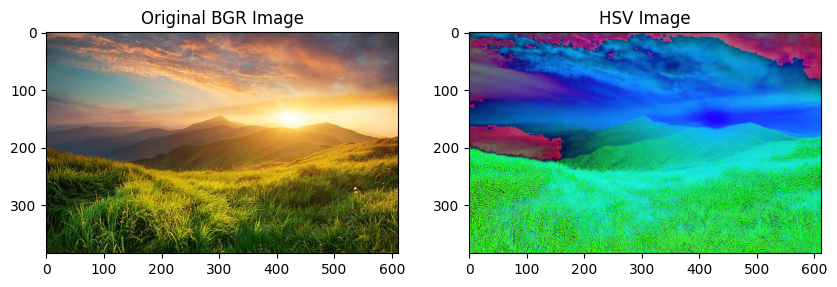

In [ ]:
# Convert BGR to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Display the HSV image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original BGR Image')
plt.imshow(image_rgb)

plt.subplot(1, 2, 2)
plt.title('HSV Image')
plt.imshow(image_hsv)  # HSV images look different from RGB/BGR

plt.show()

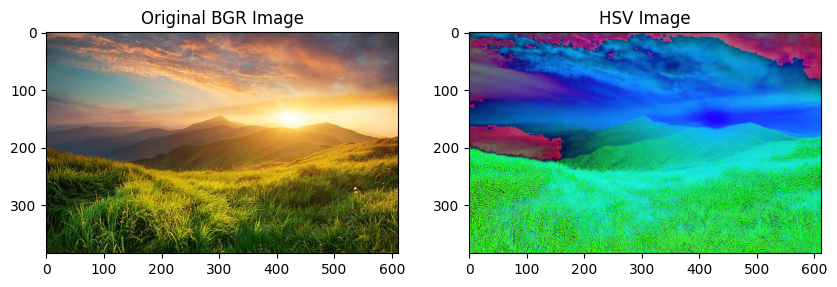

In [ ]:
# Convert BGR to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Display the HSV image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original BGR Image')
plt.imshow(image_rgb)

plt.subplot(1, 2, 2)
plt.title('HSV Image')
plt.imshow(image_hsv)  # HSV images look different from RGB/BGR

plt.show()

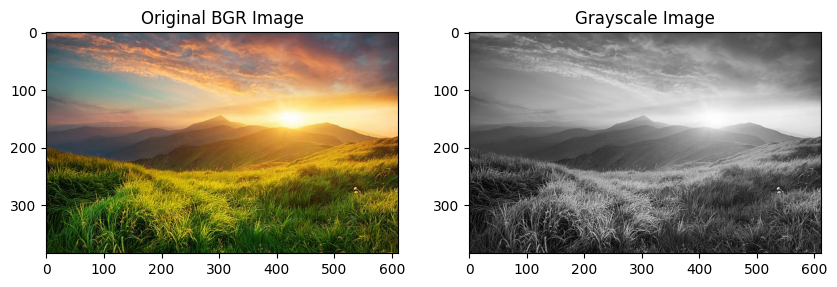

In [ ]:
 #Convert BGR to Grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original BGR Image')
plt.imshow(image_rgb)

plt.subplot(1, 2, 2)
plt.title('Grayscale Image')
plt.imshow(image_gray, cmap='gray')

plt.show()

Reading, writing and showing images

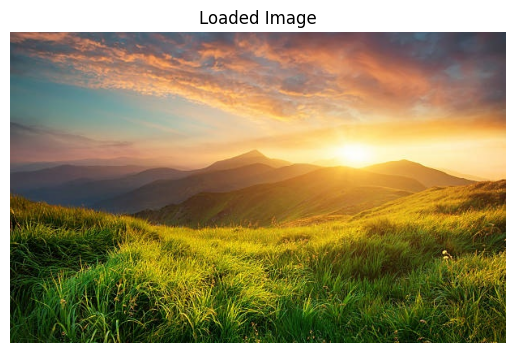

Image successfully saved as 'output_ai_images.jpg'


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Define the image path
image_path = r"/content/istockphoto-517188688-612x612.jpeg"

# Read the image
image = cv2.imread(image_path)

# Check if the image was loaded correctly
if image is None:
    print("Error: Could not read the image. Check the file path.")
else:
    # Display the image using Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.axis('off')
    plt.title('Loaded Image')
    plt.show()

    # Save the image with a new name
    output_filename = "output_ai_images.jpg"
    cv2.imwrite(output_filename, image)
    print(f"Image successfully saved as '{output_filename}'")


Video processing: capturing, writing/saving in a file, flipped video

In [ ]:
import cv2
import datetime
font=cv2.FONT_HERSHEY_SIMPLEX
fourcc=cv2.VideoWriter_fourcc(*'XVID')
out=cv2.VideoWriter('output.avi',fourcc,50.0,(640,480))
out1=cv2.VideoWriter('output1.avi',fourcc,10.0,(640,480))
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    datet=str(datetime.datetime.now()) # flip left-right
    gray = cv2.flip(frame,0)  # flip up-down
    frame=cv2.putText(frame,datet,(10,50),font,1,(0,255,255),2,cv2.LINE_AA)
    gray=cv2.putText(gray,datet,(10,50),font,1,(0,255,255),2,cv2.LINE_AA)
    gray=cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
    cv2.imshow("LIVE VIDEO FEED COLOR",frame)
    cv2.imshow("LIVE VIDEO FEED GRAY",gray)
    out.write(frame)
    out1.write(frame)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Canny edge detection

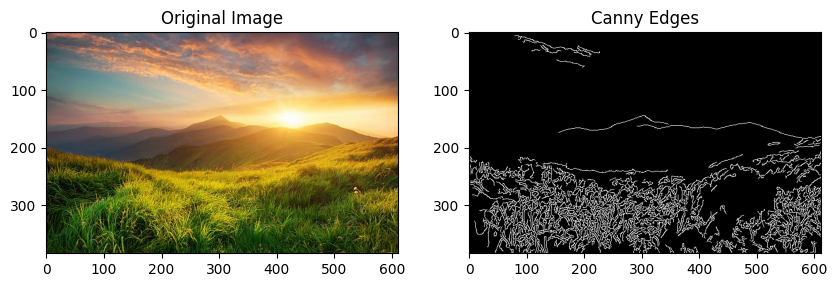

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"/content/istockphoto-517188688-612x612.jpeg")

# 1. Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 3. Apply Canny Edge Detection
edges = cv2.Canny(blurred, 50, 150) # Adjust the thresholds as needed

# Display the original and the edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')

plt.show()


HISTOGRAM EQUILISATION


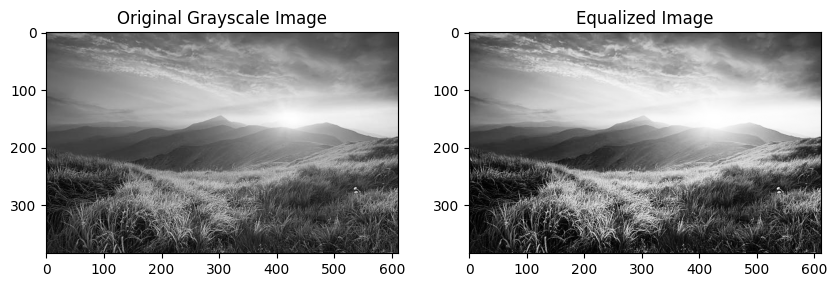

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"/content/istockphoto-517188688-612x612.jpeg")

# 1. Convert to Grayscale (if needed)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. Apply Histogram Equalization
equalized_image = cv2.equalizeHist(gray_image)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')

plt.show()


MASKING


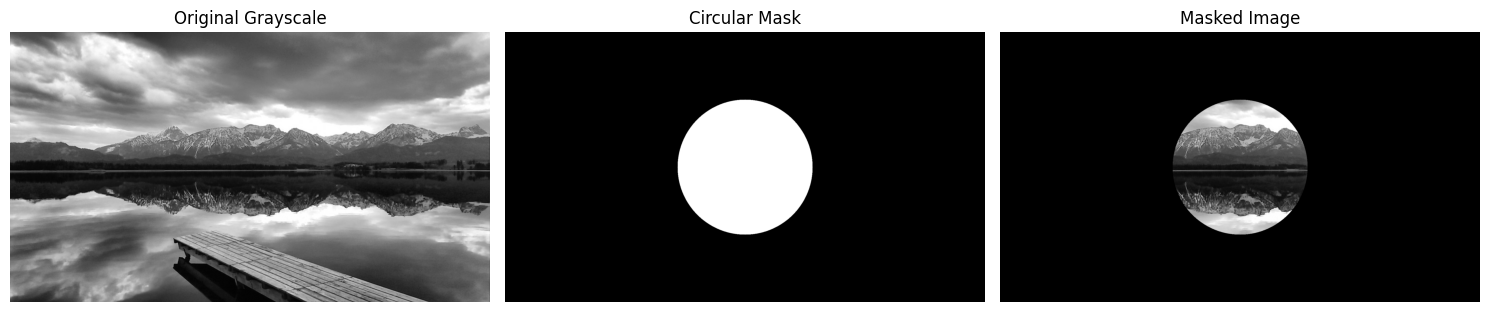

In [ ]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# Image URL
url = 'https://images.pexels.com/photos/276374/pexels-photo-276374.jpeg?cs=srgb&dl=pexels-pixabay-276374.jpg&fm=jpg'

# Add headers to avoid 403 error
headers = {'User-Agent': 'Mozilla/5.0'}
request = urllib.request.Request(url, headers=headers)
response = urllib.request.urlopen(request)

# Read and decode image as grayscale
image_data = np.asarray(bytearray(response.read()), dtype="uint8")
gray = cv2.imdecode(image_data, cv2.IMREAD_GRAYSCALE)

# Create a mask (same size as image) with a filled white circle in the center
mask = np.zeros_like(gray)
height, width = gray.shape
center = (width // 2, height // 2)
radius = min(height, width) // 4  # radius is 1/4th of the smallest dimension
cv2.circle(mask, center, radius, (255), -1)

# Apply mask to grayscale image
masked_img = cv2.bitwise_and(gray, gray, mask=mask)

# Plot original, mask, and masked result
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Circular Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Masked Image")
plt.imshow(masked_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



Morphological operation (opening, closing, erosion, dilation

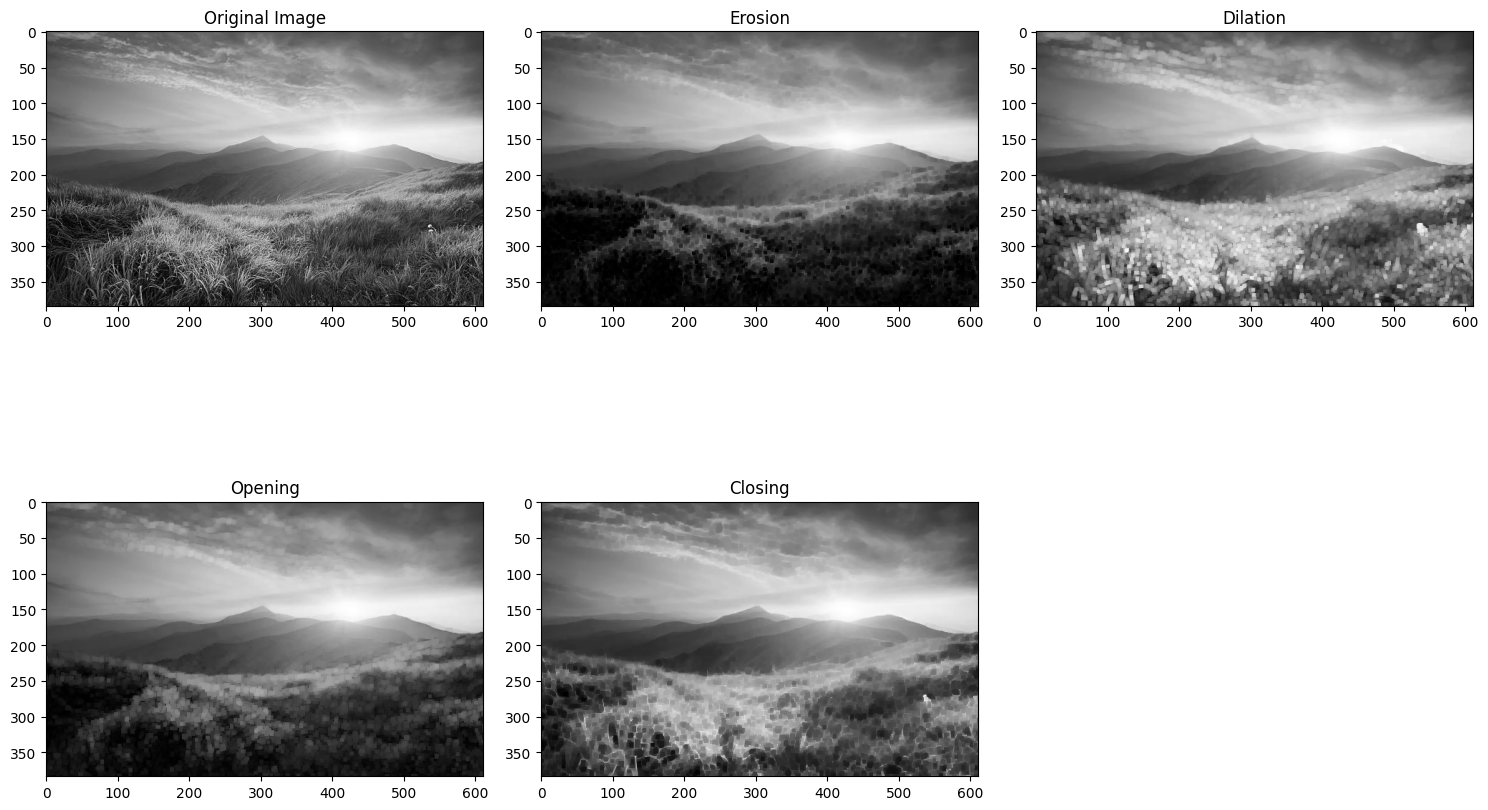

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"/content/istockphoto-517188688-612x612.jpeg", cv2.IMREAD_GRAYSCALE)

# Define the kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# 1. Erosion
erosion = cv2.erode(image, kernel, iterations=1)

# 2. Dilation
dilation = cv2.dilate(image, kernel, iterations=1)

# 3. Opening (Erosion followed by Dilation)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# 4. Closing (Dilation followed by Erosion)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)


# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title("Erosion")
plt.imshow(erosion, cmap='gray')

plt.subplot(2, 3, 3)
plt.title("Dilation")
plt.imshow(dilation, cmap='gray')

plt.subplot(2, 3, 4)
plt.title("Opening")
plt.imshow(opening, cmap='gray')

plt.subplot(2, 3, 5)
plt.title("Closing")
plt.imshow(closing, cmap='gray')

plt.tight_layout()
plt.show()


K-means algorithm for segmentation

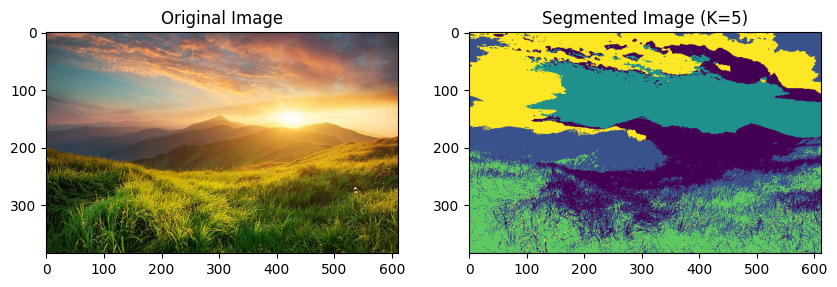

In [ ]:

import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"/content/istockphoto-517188688-612x612.jpeg")

# Check if the image was loaded correctly
if image is None:
    print("Error: Could not read the image. Check the file path.")
else:
    # Convert image to RGB (OpenCV uses BGR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels
    pixels = image_rgb.reshape((-1, 3))

    # Apply K-means clustering
    k = 5  # Number of clusters (segments)
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pixels)
    segmented_pixels = kmeans.labels_.reshape(image_rgb.shape[:2])


    # Display the segmented image
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image_rgb)


    plt.subplot(1, 2, 2)
    plt.title(f'Segmented Image (K={k})')
    plt.imshow(segmented_pixels)

    plt.show()


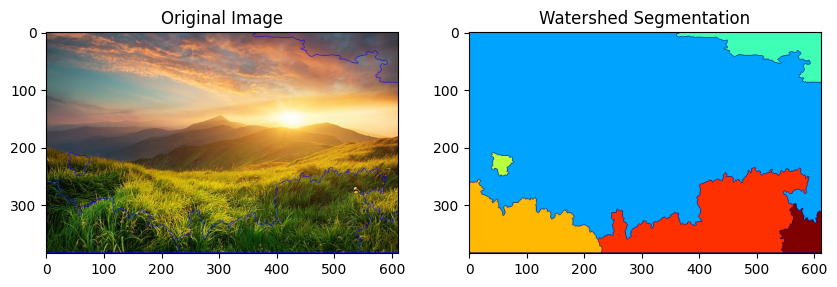

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image in color (BGR)
img = cv2.imread(r"/content/istockphoto-517188688-612x612.jpeg")

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Apply watershed algorithm
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY) # Convert to grayscale for thresholding
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Noise removal using opening
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Find sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Find sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)

# Finding unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

# Convert markers to the correct data type (CV_32SC1)
markers = markers.astype(np.int32)

# Apply watershed
markers = cv2.watershed(img, markers) # Input image should be in color (BGR)
img[markers == -1] = [255, 0, 0]

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.subplot(1, 2, 2)
plt.title("Watershed Segmentation")
plt.imshow(markers, cmap='jet') # Use a different colormap
plt.show()

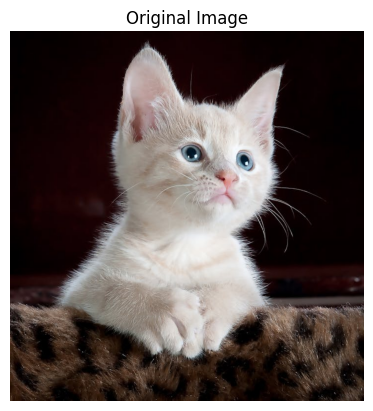

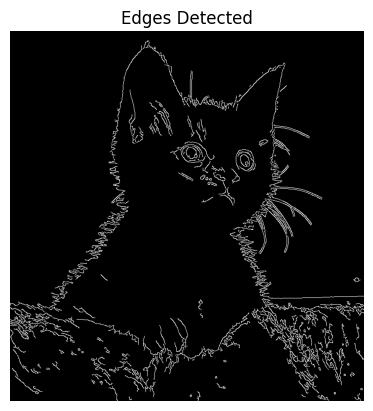

In [ ]:


!pip install opencv-python matplotlib numpy scikit-learn urllib3

import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

# Image URL (replace with your desired image URL)
image_url = 'https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'

# Function to download and process the image
def process_image(image_url):
    try:
        # Download the image from the URL
        headers = {'User-Agent': 'Mozilla/5.0'}
        request = urllib.request.Request(image_url, headers=headers)
        response = urllib.request.urlopen(request)
        image_data = np.asarray(bytearray(response.read()), dtype="uint8")
        image = cv2.imdecode(image_data, cv2.IMREAD_COLOR)

        # Check if image is loaded successfully
        if image is None:
            print("Error: Could not load the image from the URL.")
            return

        # Convert to RGB for display with matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title("Original Image")
        plt.show()

        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply a blur to reduce noise
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Detect edges using Canny edge detector
        edges = cv2.Canny(blurred, 50, 150)

        # Display the results
        plt.imshow(edges, cmap='gray')
        plt.axis('off')
        plt.title("Edges Detected")
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")


# Process the image
process_image(image_url)
